1. Exploring Fancy Indexing

In [2]:
import numpy as np
rng = np.random.default_rng()

x = rng.integers(100, size=10)
print(x)

[72 81 86 35 17 46 26 63 40 49]


In [4]:
# Suppose we want to excess three different elemets
[x[3], x[7], x[2]]

[np.int64(35), np.int64(63), np.int64(86)]

In [5]:
# Alternatively, we can pass a single list or array of indices to obtain the same result
ind = [3, 7, 4]
x[ind]

array([35, 63, 17])

In [6]:
# When using arrays of indices, the shape of the result reflects the shape of the index
# arrays rather than the shape of the array being indexed:
ind = np.array([[3, 7],
                [4, 5]])
x[ind]

array([[35, 63],
       [17, 46]])

In [8]:
# Fancy indexing also works in multiple dimensions.
X = np.arange(12).reshape((3, 4))
X

array([[ 0,  1,  2,  3],
       [ 4,  5,  6,  7],
       [ 8,  9, 10, 11]])

In [9]:
row = np.array([0, 1, 2])
col = np.array([2, 1, 3])
X[row, col]

array([ 2,  5, 11])

In [10]:
X[row[:, np.newaxis], col]

array([[ 2,  1,  3],
       [ 6,  5,  7],
       [10,  9, 11]])

In [11]:
row[:, np.newaxis] * col

array([[0, 0, 0],
       [2, 1, 3],
       [4, 2, 6]])

2. Combined Indexing

In [12]:
print(X)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]


In [13]:
# We can combine fancy and simple indices:
X[2, [2, 0, 1]]

array([10,  8,  9])

In [14]:
# We can also combine fancy indexing with slicing:
X[1:, [2, 0, 1]]

array([[ 6,  4,  5],
       [10,  8,  9]])

In [15]:
# we can combine fancy indexing with masking:
mask = np.array([True, False, True, False])
X[row[:, np.newaxis], mask]

array([[ 0,  2],
       [ 4,  6],
       [ 8, 10]])

In [16]:
# Example: Selecting Random Points
mean = [0, 0]
cov = [[1, 2],
       [2, 5]]
X = rng.multivariate_normal(mean, cov, 100)
X.shape

(100, 2)

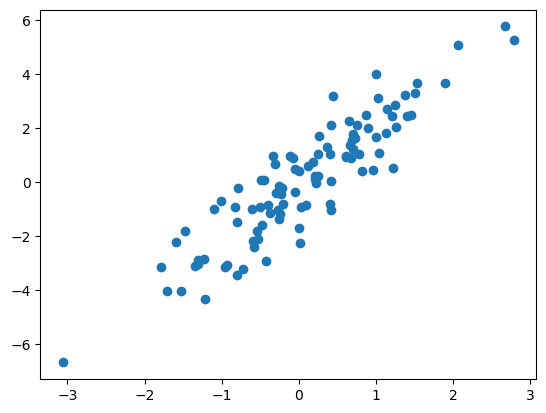

In [18]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]);
plt.show();

In [20]:
indices = np.random.choice(X.shape[0], size=20, replace=False) # Randomly select 20 points without replacement
indices

array([48, 91, 17, 71, 70, 89, 81, 83, 35, 92, 65, 16, 24,  0, 49, 63, 10,
       72, 82, 20], dtype=int32)

In [21]:
selection = X[indices] # Select the points using fancy indexing
selection.shape 

(20, 2)

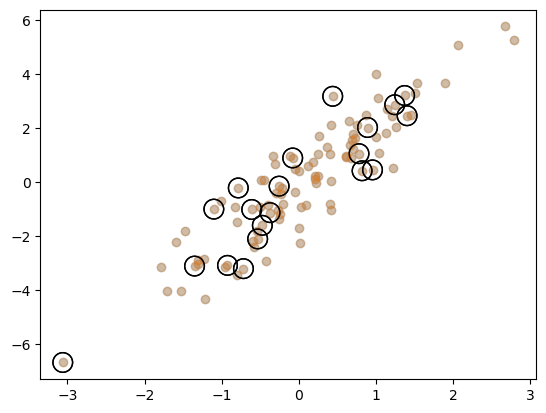

In [23]:
plt.scatter(X[:, 0], X[:, 1], alpha=0.3) # Plot all points with some transparency
plt.scatter(selection[:, 0], selection[:, 1], # Plot the selected points
            facecolor='none', edgecolor='black', s=200); # Show the plot
plt.show();

4. Modifying Values with Fancy Indexing

In [27]:
import numpy as np

x = np.arange(10)  # or some range you want
i = np.array([2, 1, 8, 4])
x[i] = 99
print(x)


[ 0 99 99  3 99  5  6  7 99  9]


In [28]:
x[i] -= 10  # Subtract 10 from the elements at indices i
print(x)


[ 0 89 89  3 89  5  6  7 89  9]


In [31]:
x = np.zeros(10)
x[[0, 0]] = [4, 6] # Assigning multiple values to the same index
print(x)


[6. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
i = [2, 3, 3, 4, 4, 4]
x[i] += 1
x
# When you do x[i] += 1, NumPy:

# Indexes into x using i → creates a temporary array like [x[2], x[3], x[3], x[4], x[4], x[4]]

# Adds 1 to that temporary array → [1, 1, 1, 1, 1, 1]

# Tries to assign the results back to the same indices, but since it's done element-wise and not by accumulating over indices, repeats overwrite each other.

# So instead of accumulating:

# x[3] is written to twice — but the second write just overwrites the first.

# x[4] is written to three times — again, just overwritten.

array([6., 0., 1., 1., 1., 0., 0., 0., 0., 0.])

In [ ]:
x = np.zeros(10)
np.add.at(x, i, 1)  # Use np.add.at to accumulate values at indices
print(x)

# What this does:
# x = np.zeros(10) creates a NumPy array of 10 zeros.

# np.add.at(x, i, 1) performs in-place, repeated-index-safe addition:

# x[2] += 1 → now 1

# x[3] += 1 twice → now 2

# x[4] += 1 three times → now 3

[0. 0. 1. 2. 3. 0. 0. 0. 0. 0.]


In [34]:
# Example: Binning Data

In [ ]:
rng = np.random.default_rng(seed=1701)
x = rng.normal(size=100)

# compute a histogram by hand
bins = np.linspace(-5, 5, 20) #Creates 20 evenly spaced values between -5 and 5. These define the bin edges for the histogram. There will be 19 bins between these 20 edges.
counts = np.zeros_like(bins) # Initializes an array counts with 19 zeros — one for each bin. We'll increment this array to count how many values fall into each bin.

# find the appropriate bin for each x
i = np.searchsorted(bins, x)

# add 1 to each of these bins
np.add.at(counts, i, 1)

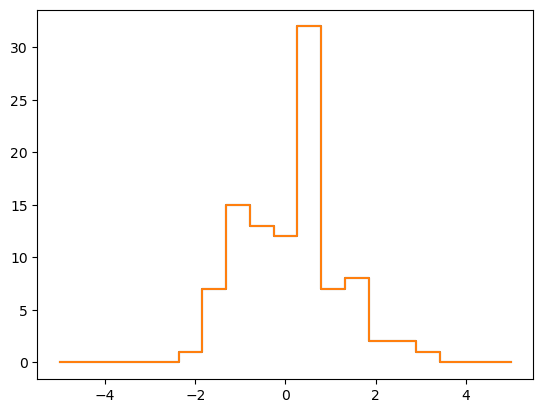

In [37]:
# plot the result
plt.plot(bins, counts, drawstyle ='steps');
plt.show();

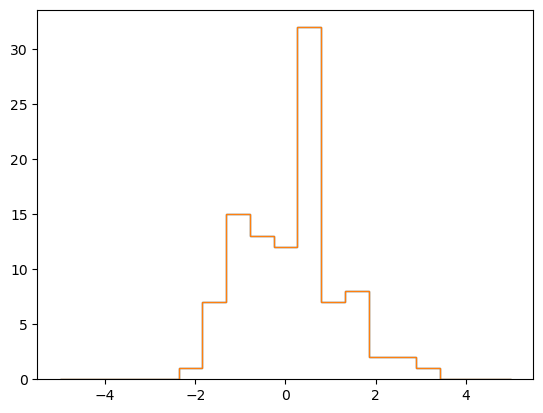

In [40]:
plt.hist(x, bins, histtype='step');
plt.show();

In [ ]:
# benchmarking the performance of NumPy's built-in histogram vs your custom histogram logic using %timeit
print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)
print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy histogram (100 points):
37.6 μs ± 11 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)
Custom histogram (100 points):
18.3 μs ± 4.01 μs per loop (mean ± std. dev. of 7 runs, 10,000 loops each)


In [41]:
x = rng.normal(size=1000000)
print(f"NumPy histogram ({len(x)} points):")
%timeit counts, edges = np.histogram(x, bins)

print(f"Custom histogram ({len(x)} points):")
%timeit np.add.at(counts, np.searchsorted(bins, x), 1)

NumPy histogram (1000000 points):
14.8 ms ± 687 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)
Custom histogram (1000000 points):
115 ms ± 2.82 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
